In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
df_customers = pd.read_csv('Customers.csv')
df_products = pd.read_csv('Products.csv')
df_transactions = pd.read_csv('Transactions.csv')

In [12]:
df_customer_transactions = pd.merge(df_transactions, df_customers, on='CustomerID', how='left')

# Merge the result with products dataset on 'ProductID'
df = pd.merge(df_customer_transactions, df_products, on='ProductID', how='left')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [13]:
df.shape

(1000, 13)

In [14]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [15]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [16]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [17]:
df=df.drop('Price_y',axis=1)

In [18]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [19]:
df['Price']=df['Price_x']

In [20]:
df=df.drop('Price_x',axis=1)

In [21]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22671/3472486664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_total_spend.index, y=category_total_spend.values, palette='viridis')


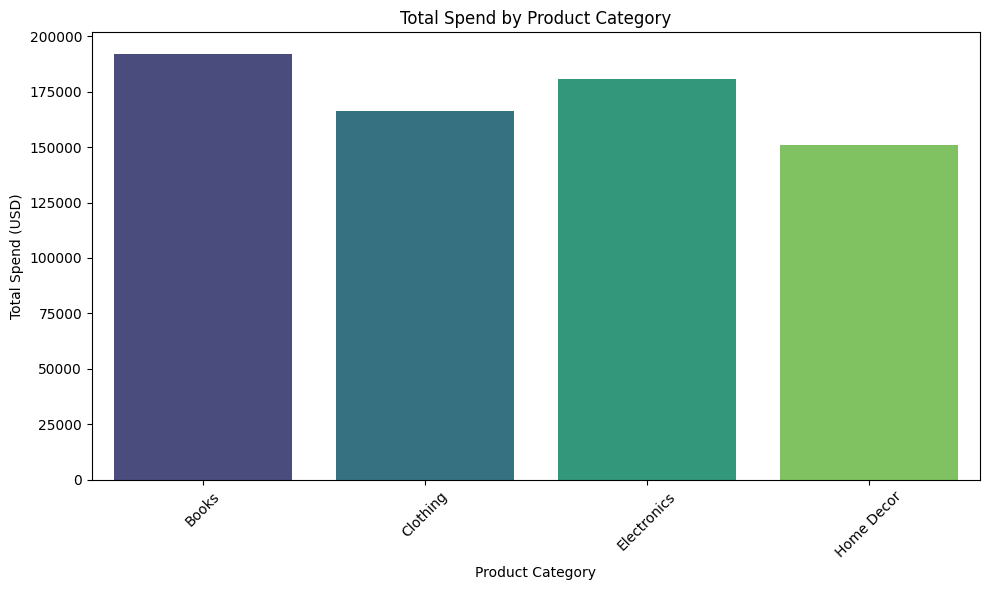

In [15]:
# Analyze Total Spend by Product Category
df['TotalSpend'] = df['Quantity'] * df['Price']
category_total_spend = df.groupby('Category')['TotalSpend'].sum()

# Plot Total Spend by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_total_spend.index, y=category_total_spend.values, palette='viridis')
plt.title('Total Spend by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Books category brings the most revenue 

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22671/3547756214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_spend.index, y=category_avg_spend.values, palette='plasma')


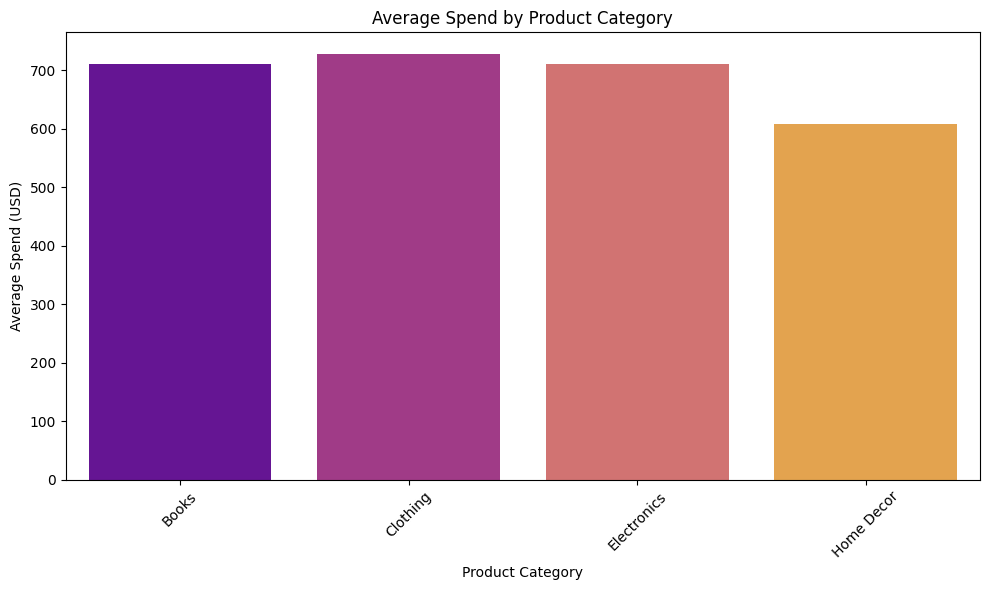

In [16]:

# Analyze Average Spend per Product Category
category_avg_spend = df.groupby('Category')['TotalSpend'].mean()

# Plot Average Spend by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_spend.index, y=category_avg_spend.values, palette='plasma')
plt.title('Average Spend by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Spend (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Average Spend by Product Category shows similar sales/basket size (Home Decor has a less average)

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22671/3695729008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_product_count.index, y=region_product_count.values, palette='muted')


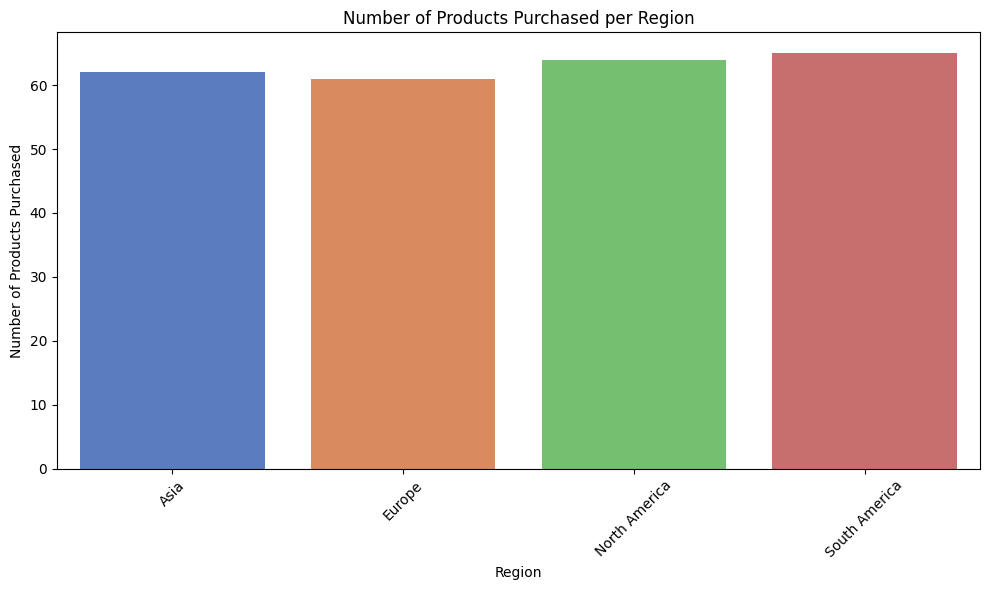

In [17]:
# Count of Products Purchased per Region
region_product_count = df.groupby('Region')['ProductName'].nunique()

# Plot Product Count per Region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_product_count.index, y=region_product_count.values, palette='muted')
plt.title('Number of Products Purchased per Region')
plt.xlabel('Region')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Number of Products Purchased per Region
# shows similar pattern as the no. of transaction per region
# we need to focus on Asia and Europe as they have the least buying 


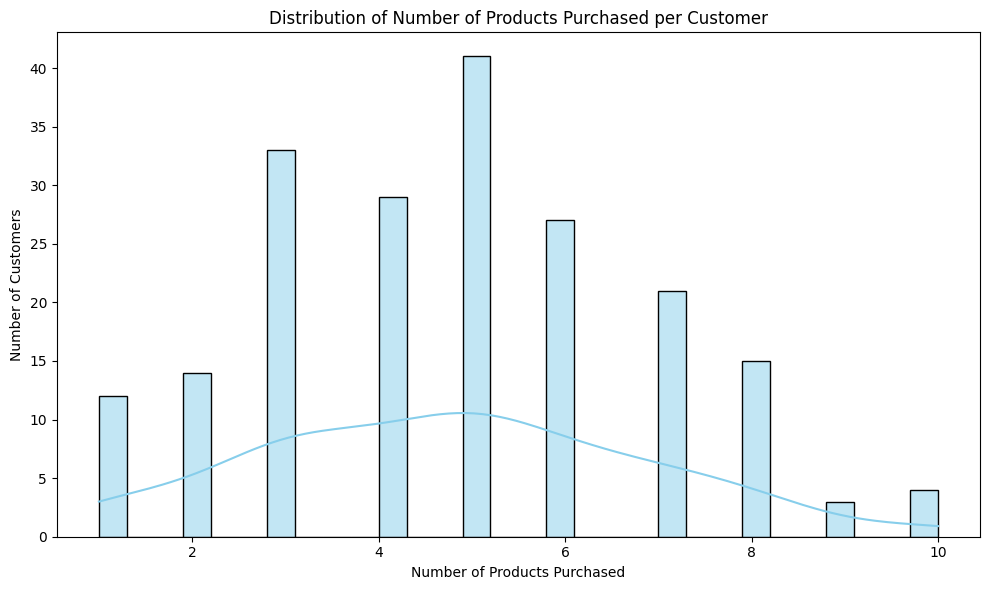

In [19]:
customer_product_count = df.groupby('CustomerID')['ProductName'].nunique()

# Plot the distribution of unique products purchased per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_product_count, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Products Purchased per Customer')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22671/637203169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_total_spend.index, y=product_total_spend.values, palette='coolwarm')


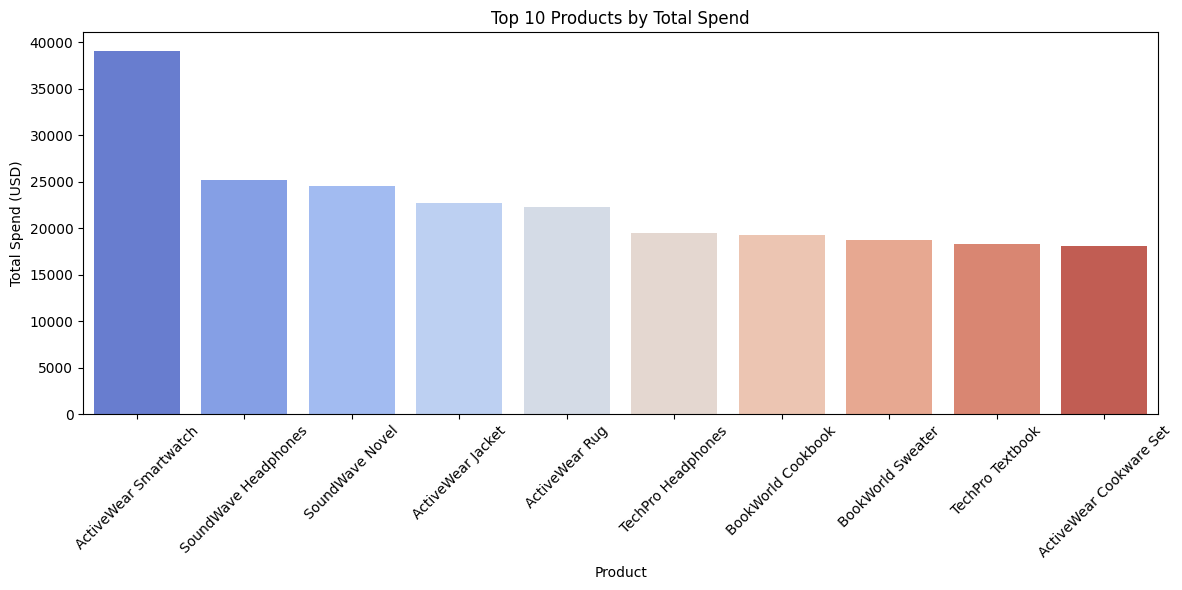

In [18]:
# Top Products by Total Spend
product_total_spend = df.groupby('ProductName')['TotalSpend'].sum().sort_values(ascending=False).head(10)

# Plot Top Products by Total Spend
plt.figure(figsize=(12, 6))
sns.barplot(x=product_total_spend.index, y=product_total_spend.values, palette='coolwarm')
plt.title('Top 10 Products by Total Spend')
plt.xlabel('Product')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Top Products by Total Spend is ActiveWear Smartwatch (which has a great sale rest other have very less sales (comapritevely))

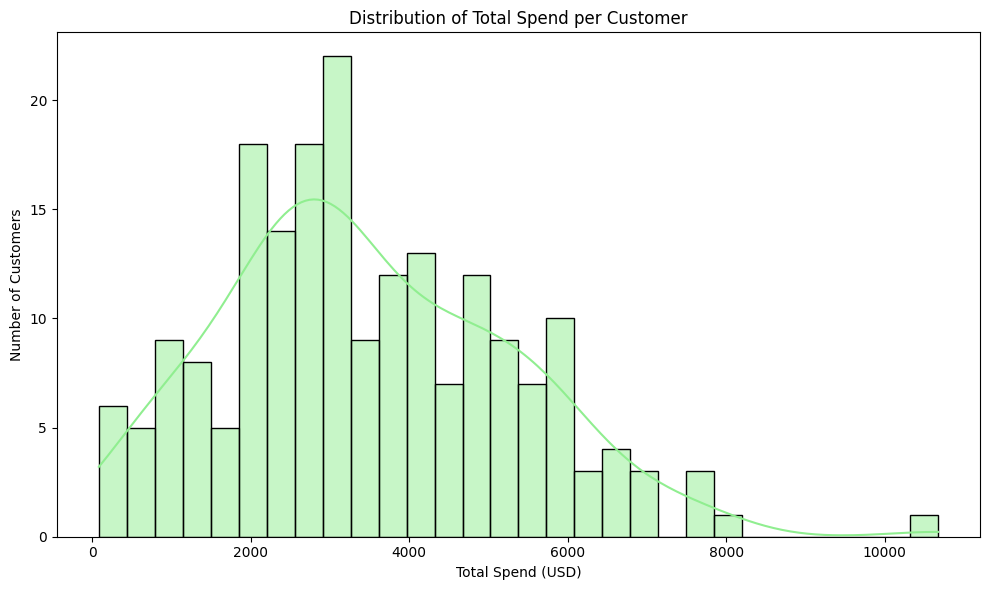

In [20]:
# Total Spend per Customer
df['TotalSpend'] = df['Quantity'] * df['Price']
customer_total_spend = df.groupby('CustomerID')['TotalSpend'].sum()

# Plot total spend distribution per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_total_spend, bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()